# Setting Up

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import json
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")

# Exploring and Preparing Data

In [4]:
covid=pd.read_csv('/content/gdrive/My Drive/COVID/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              68558 non-null  int64  
 1   ObservationDate  68558 non-null  object 
 2   Province/State   44125 non-null  object 
 3   Country/Region   68558 non-null  object 
 4   Last Update      68558 non-null  object 
 5   Confirmed        68558 non-null  float64
 6   Deaths           68558 non-null  float64
 7   Recovered        68558 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
#Extracting Pakistan's data 
covid_pak=covid[covid['Country/Region']=="Pakistan"]


#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]
covid_uk=covid[covid['Country/Region']=="UK"]

#Extracting data of neighbouring countries
covid_india=covid[covid['Country/Region']=="India"]
covid_china=covid[covid['Country/Region']=="Mainland China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [9]:
covid_pak.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2445,2446,02/26/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2549,2550,02/27/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2656,2657,02/28/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2767,2768,02/29/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2889,2890,03/01/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
3019,3020,03/02/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
3164,3165,03/03/2020,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3320,3321,03/04/2020,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3483,3484,03/05/2020,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3663,3664,03/06/2020,NaN,Pakistan,2020-03-06T13:03:12,6.0,0.0,0.0


In [16]:
#Converting the date into Datetime format
covid_pak["ObservationDate"]=pd.to_datetime(covid_pak["ObservationDate"])

covid_spain["ObservationDate"]=pd.to_datetime(covid_spain["ObservationDate"])
covid_us["ObservationDate"]=pd.to_datetime(covid_us["ObservationDate"])
covid_italy["ObservationDate"]=pd.to_datetime(covid_italy["ObservationDate"])
covid_iran["ObservationDate"]=pd.to_datetime(covid_iran["ObservationDate"])
covid_france["ObservationDate"]=pd.to_datetime(covid_france["ObservationDate"])
covid_uk["ObservationDate"]=pd.to_datetime(covid_uk["ObservationDate"])

covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])
covid_china["ObservationDate"]=pd.to_datetime(covid_china["ObservationDate"])
covid_afg["ObservationDate"]=pd.to_datetime(covid_afg["ObservationDate"])
covid_nepal["ObservationDate"]=pd.to_datetime(covid_nepal["ObservationDate"])
covid_bhutan["ObservationDate"]=pd.to_datetime(covid_bhutan["ObservationDate"])
covid_lanka["ObservationDate"]=pd.to_datetime(covid_lanka["ObservationDate"])
covid_ban["ObservationDate"]=pd.to_datetime(covid_ban["ObservationDate"])

In [17]:
covid_pak.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2445,2446,2020-02-26,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2549,2550,2020-02-27,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2656,2657,2020-02-28,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2767,2768,2020-02-29,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2889,2890,2020-03-01,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0


In [21]:
#Grouping the data based on the Date 
pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-02-26,2.0,0.0,0.0
2020-02-27,2.0,0.0,0.0
2020-02-28,2.0,0.0,0.0
2020-02-29,4.0,0.0,0.0
2020-03-01,4.0,0.0,0.0


In [47]:
# getting latest statistics

print("          Pakistan Latest Statistics as of {}\n".format(pak_datewise.index[-1]))

print("Number of Confirmed Cases",pak_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",pak_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",pak_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",pak_datewise["Confirmed"].iloc[-1]-pak_datewise["Recovered"].iloc[-1]-pak_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",pak_datewise["Recovered"].iloc[-1]+pak_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(pak_datewise["Confirmed"].iloc[-1]/pak_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(pak_datewise["Recovered"].iloc[-1]/pak_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(pak_datewise["Deaths"].iloc[-1]/pak_datewise.shape[0]))
print("Number of New Cofirmed Cases in last 24 hours are",pak_datewise["Confirmed"].iloc[-1]-pak_datewise["Confirmed"].iloc[-2])
print("Number of New Recoverd Cases in last 24 hours are",pak_datewise["Recovered"].iloc[-1]-pak_datewise["Recovered"].iloc[-2])
print("Number of New Death Cases in last 24 hours are",pak_datewise["Deaths"].iloc[-1]-pak_datewise["Deaths"].iloc[-2])

          Pakistan Latest Statistics as of 2020-07-20 00:00:00

Number of Confirmed Cases 266096.0
Number of Recovered Cases 208030.0
Number of Death Cases 5639.0
Number of Active Cases 52427.0
Number of Closed Cases 213669.0
Approximate Number of Confirmed Cases per day 1823.0
Approximate Number of Recovered Cases per day 1425.0
Approximate Number of Death Cases per day 39.0
Number of New Cofirmed Cases in last 24 hours are 1013.0
Number of New Recoverd Cases in last 24 hours are 2101.0
Number of New Death Cases in last 24 hours are 40.0


Text(0.5, 1.0, 'Distribution of Number of Active Cases in Pakistan over Date')

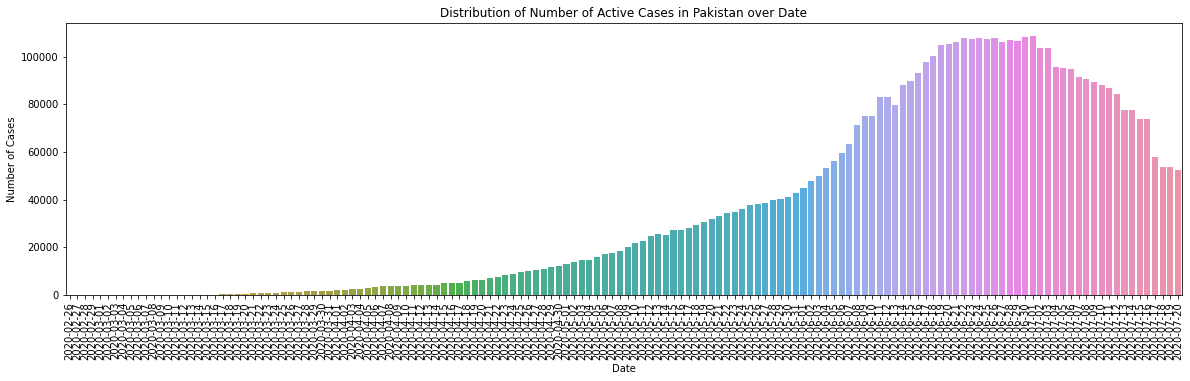

In [53]:
plt.figure(figsize=(20,5))
sns.barplot(x=pak_datewise.index.date,y=pak_datewise["Confirmed"]-pak_datewise["Recovered"]-pak_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Active Cases in Pakistan over Date")

Text(0.5, 1.0, 'Distribution of Number of Closed Cases in Pakistan over Date')

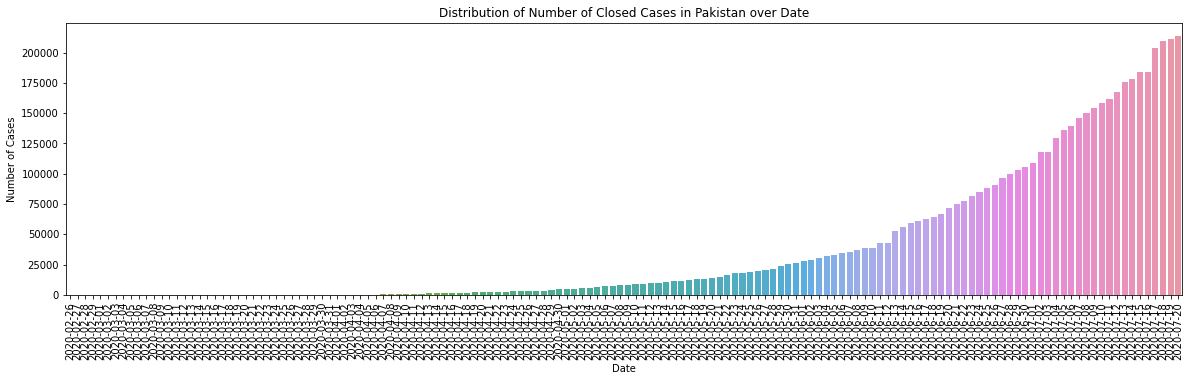

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(x=pak_datewise.index.date,y=pak_datewise["Recovered"]+pak_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Closed Cases in Pakistan over Date")

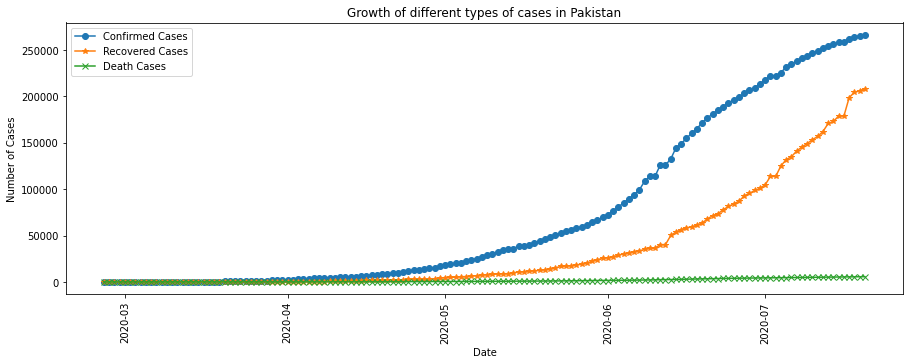

In [55]:
plt.figure(figsize=(15,5))
plt.plot(pak_datewise["Confirmed"],label="Confirmed Cases",marker='o')
plt.plot(pak_datewise["Recovered"],label="Recovered Cases",marker='*')
plt.plot(pak_datewise["Deaths"],label="Death Cases",marker="x")
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Growth of different types of cases in Pakistan")
plt.legend()

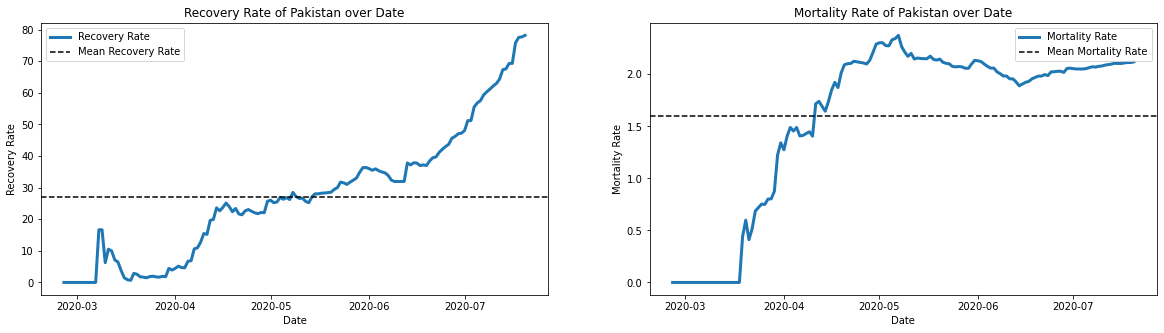

In [56]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,5))
ax1.plot((pak_datewise["Recovered"]/pak_datewise["Confirmed"])*100,label="Recovery Rate",linewidth=3)
ax1.axhline(((pak_datewise["Recovered"]/pak_datewise["Confirmed"])*100).mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax1.set_xlabel("Date")
ax1.set_ylabel("Recovery Rate")
ax1.set_title("Recovery Rate of Pakistan over Date")
ax1.legend()
ax2.plot((pak_datewise["Deaths"]/pak_datewise["Confirmed"])*100,label="Mortality Rate",linewidth=3)
ax2.axhline(((pak_datewise["Deaths"]/pak_datewise["Confirmed"])*100).mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax2.set_xlabel("Date")
ax2.set_ylabel("Mortality Rate")
ax2.set_title("Mortality Rate of Pakistan over Date")
ax2.legend()

(array([737485., 737516., 737546., 737577., 737607.]),
 <a list of 5 Text major ticklabel objects>)

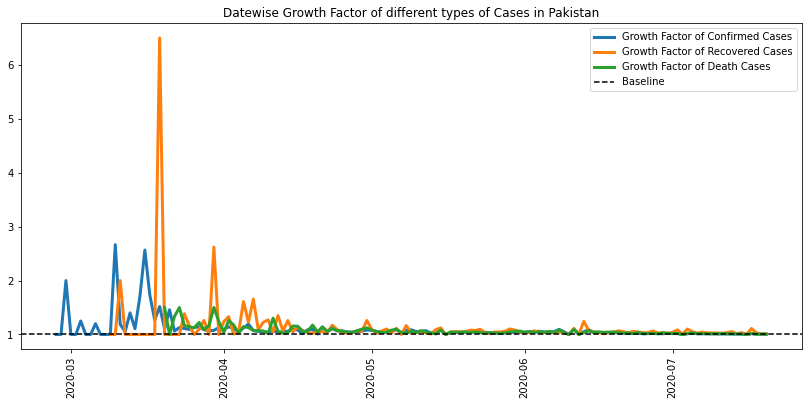

In [57]:
plt.figure(figsize=(14,6))
plt.plot(pak_datewise["Confirmed"]/pak_datewise["Confirmed"].shift(),linewidth=3,label="Growth Factor of Confirmed Cases")
plt.plot(pak_datewise["Recovered"]/pak_datewise["Recovered"].shift(),linewidth=3,label="Growth Factor of Recovered Cases")
plt.plot(pak_datewise["Deaths"]/pak_datewise["Deaths"].shift(),linewidth=3,label="Growth Factor of Death Cases")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.legend()
plt.title("Datewise Growth Factor of different types of Cases in Pakistan")
plt.xticks(rotation=90)

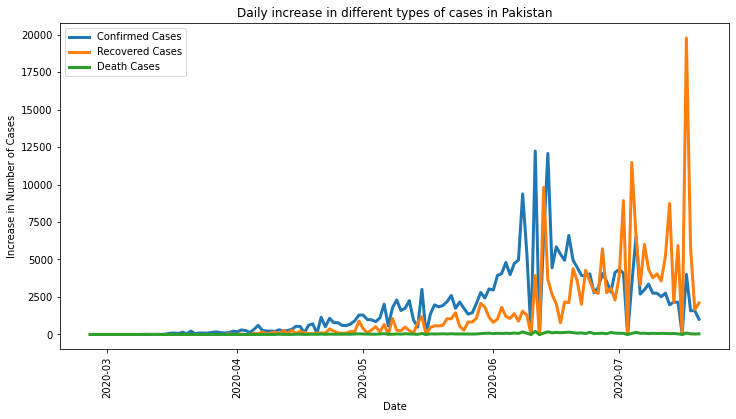

In [58]:
plt.figure(figsize=(12,6))
plt.plot(pak_datewise["Confirmed"].diff().fillna(0),linewidth=3,label="Confirmed Cases")
plt.plot(pak_datewise["Recovered"].diff().fillna(0),linewidth=3,label="Recovered Cases")
plt.plot(pak_datewise["Deaths"].diff().fillna(0),linewidth=3,label="Death Cases")
plt.ylabel("Increase in Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in different types of cases in Pakistan")
plt.xticks(rotation=90)
plt.legend()

# Pakistan Against Its Neighbours

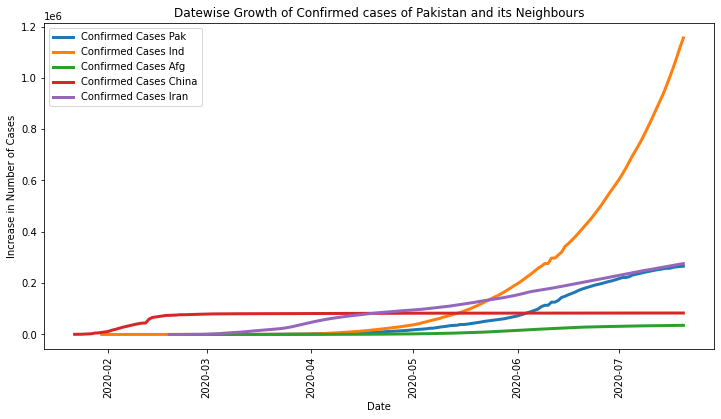

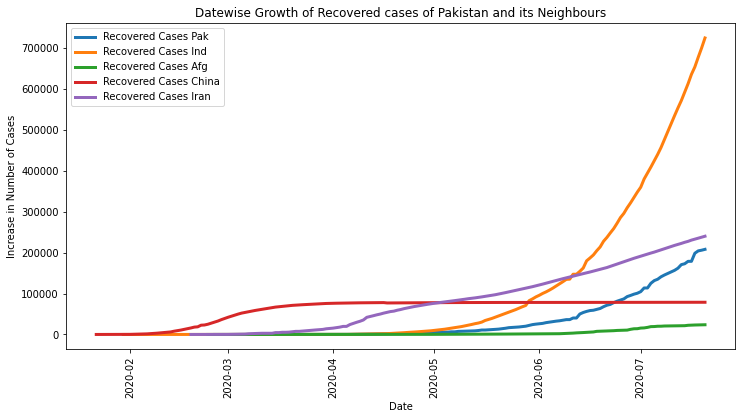

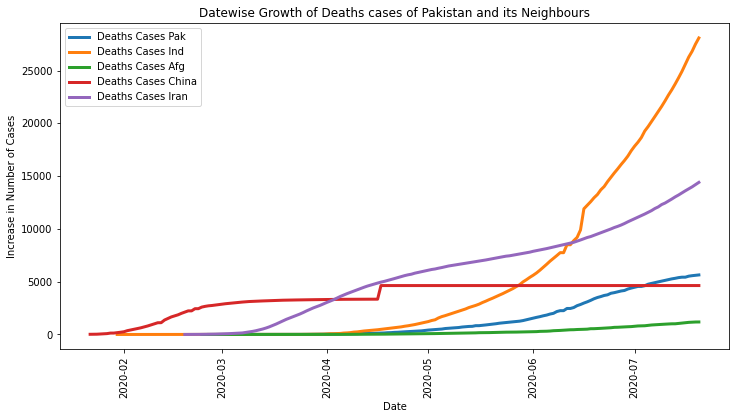

In [75]:
for label in ["Confirmed", "Recovered", "Deaths"]:
  plt.figure(figsize=(12,6))
  plt.plot(pak_datewise[label],linewidth=3,label=f"{label} Cases Pak")
  plt.plot(india_datewise[label],linewidth=3,label=f"{label} Cases Ind")
  plt.plot(afg_datewise[label],linewidth=3,label=f"{label} Cases Afg")
  plt.plot(china_datewise[label],linewidth=3,label=f"{label} Cases China")
  plt.plot(iran_datewise[label],linewidth=3,label=f"{label} Cases Iran")
  plt.ylabel("Increase in Number of Cases")
  plt.xlabel("Date")
  plt.title(f"Datewise Growth of {label} cases of Pakistan and its Neighbours")
  plt.xticks(rotation=90)
  plt.legend()

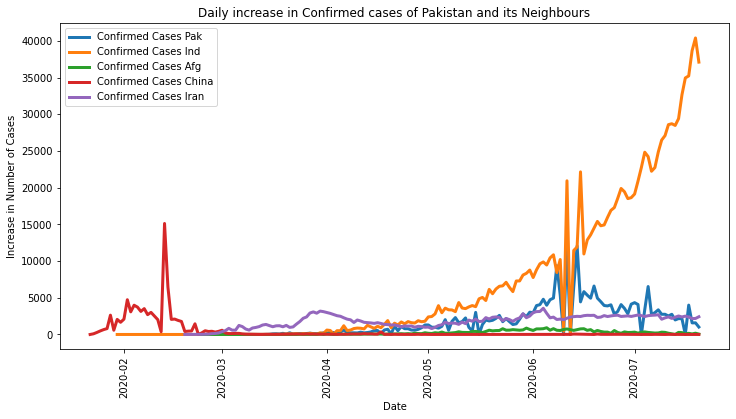

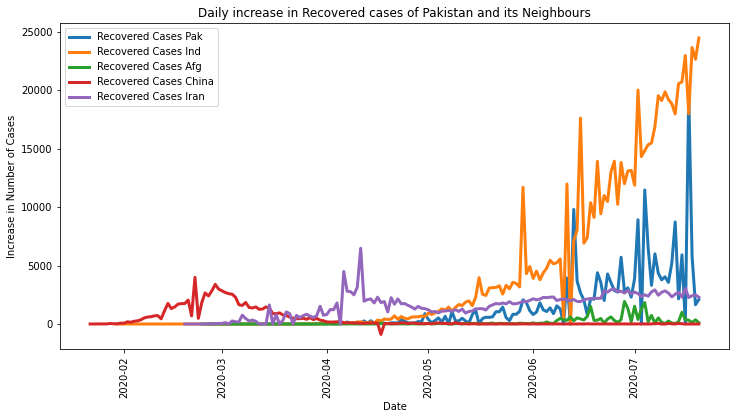

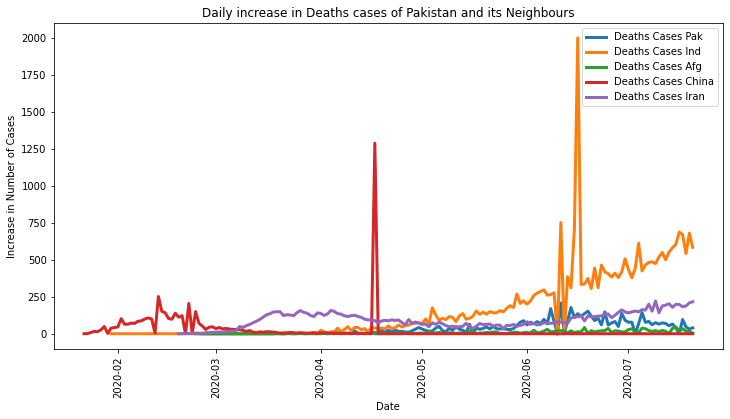

In [67]:
for label in ["Confirmed", "Recovered", "Deaths"]:
  plt.figure(figsize=(12,6))
  plt.plot(pak_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Pak")
  plt.plot(india_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Ind")
  plt.plot(afg_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Afg")
  plt.plot(china_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases China")
  plt.plot(iran_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Iran")
  plt.ylabel("Increase in Number of Cases")
  plt.xlabel("Date")
  plt.title(f"Daily increase in {label} cases of Pakistan and its Neighbours")
  plt.xticks(rotation=90)
  plt.legend()

# Pakistan Against Other Countries

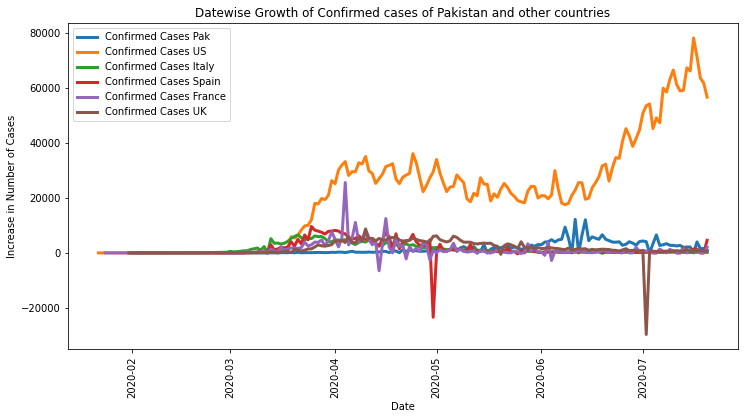

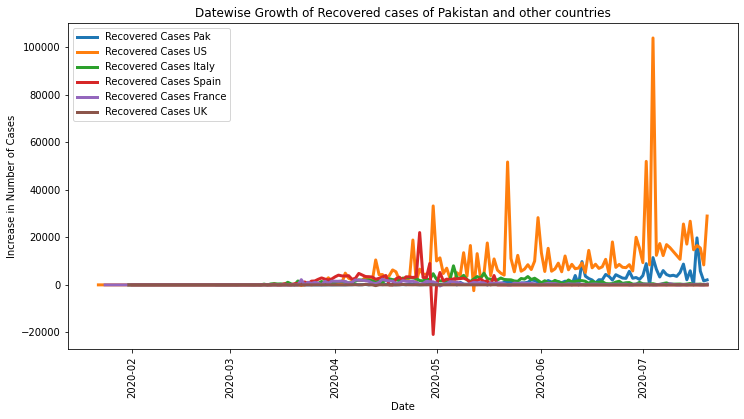

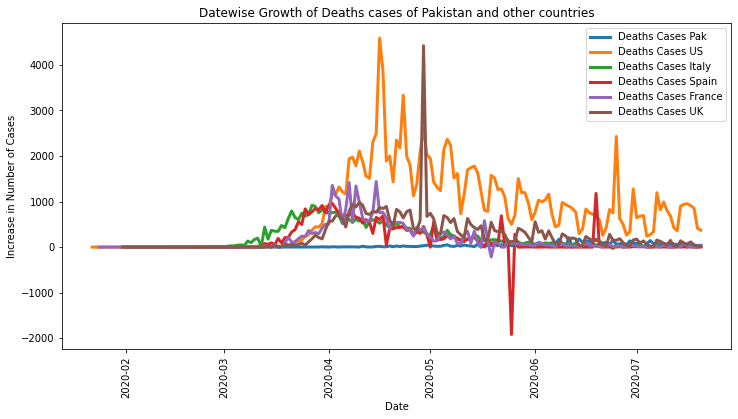

In [76]:
for label in ["Confirmed", "Recovered", "Deaths"]:
  plt.figure(figsize=(12,6))
  plt.plot(pak_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Pak")
  plt.plot(us_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases US")
  plt.plot(italy_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Italy")
  plt.plot(spain_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases Spain")
  plt.plot(france_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases France")
  plt.plot(uk_datewise[label].diff().fillna(0),linewidth=3,label=f"{label} Cases UK")
  plt.ylabel("Increase in Number of Cases")
  plt.xlabel("Date")
  plt.title(f"Datewise Growth of {label} cases of Pakistan and other countries")
  plt.xticks(rotation=90)
  plt.legend()

In [ ]:
for label in ["Confirmed", "Recovered", "Deaths"]:
  plt.figure(figsize=(12,6))
  plt.plot(pak_datewise[label],linewidth=3,label=f"{label} Cases Pak")
  plt.plot(us_datewise[label],linewidth=3,label=f"{label} Cases US")
  plt.plot(italy_datewise[label],linewidth=3,label=f"{label} Cases Italy")
  plt.plot(spain_datewise[label],linewidth=3,label=f"{label} Cases Spain")
  plt.plot(france_datewise[label],linewidth=3,label=f"{label} Cases France")
  plt.plot(uk_datewise[label],linewidth=3,label=f"{label} Cases UK")
  plt.ylabel("Increase in Number of Cases")
  plt.xlabel("Date")
  plt.title(f"Growth of {label} cases of Pakistan and other countries")
  plt.xticks(rotation=90)
  plt.legend()